### Read input from text file and compare which search algorithm is faster

In [6]:
with open("input.txt", "r") as f:
    lines = f.readlines()

graph_str = lines[0].strip()
source_input = lines[1].strip()
destination_input = lines[2].strip()
graph_input = eval(graph_str)

In [7]:
def bfs_check(graph,source,destination):
    Q = [[source]]
    visited = []
    while Q:
        path = Q.pop(0)
        node = path[-1]
        if node == destination:
            return path
        if node not in visited:
            visited.append(node)
            for neighbour in graph[node]:
                new_path = list(path)
                new_path.append(neighbour)
                Q.append(new_path)
    return "PATH NOT FOUND"

def dfs_check(graph,source,destination):
    visited = []
    stack = [[source]]
    while stack:
        path = stack.pop()
        node = path[-1]
        if node == destination:
            return path
        if node not in visited:
            visited.append(node)
            for neighbour in graph[node]:
                new_path = list(path)
                new_path.append(neighbour)
                stack.append(new_path)
    return "PATH NOT FOUND"


a = bfs_check(graph_input, source_input, destination_input)
b = dfs_check(graph_input, source_input, destination_input)
print("No. of comparison(BFS):",len(a) - 1)
print("No. of comparison(DFS):",len(b) - 1)


No. of comparison(BFS): 2
No. of comparison(DFS): 3


## Visualise the graph

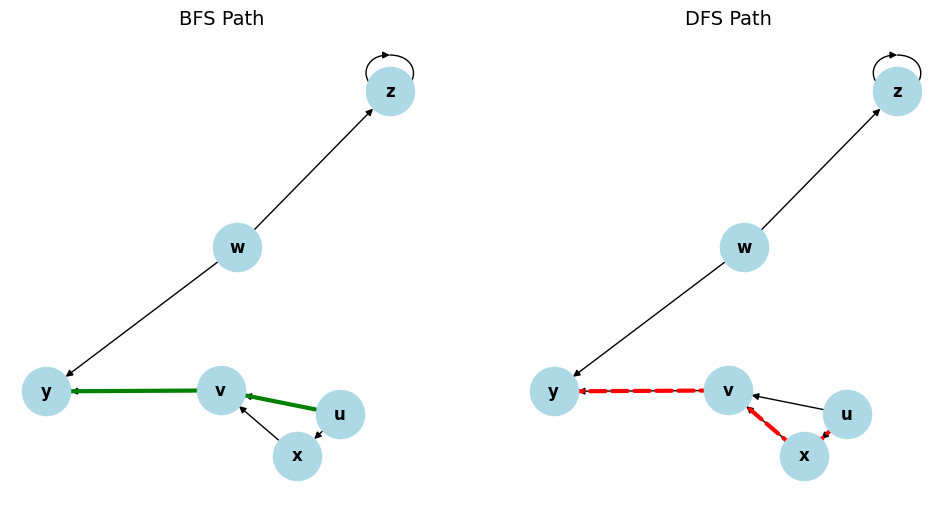

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_paths_side_by_side(graph, bfs_path, dfs_path):
    G = nx.DiGraph()
    for node, neighbors in graph.items():
        for n in neighbors:
            G.add_edge(node, n)

    pos = nx.spring_layout(G, seed=42)

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # BFS Graph
    nx.draw(G, pos, with_labels=True, node_size=1200, node_color="lightblue",
            font_size=12, font_weight="bold", ax=axes[0])
    if bfs_path:
        bfs_edges = list(zip(bfs_path, bfs_path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=bfs_edges, edge_color="green",
                            width=3, style="solid", ax=axes[0])
    axes[0].set_title("BFS Path", fontsize=14)

    # DFS Graph
    nx.draw(G, pos, with_labels=True, node_size=1200, node_color="lightblue",
            font_size=12, font_weight="bold", ax=axes[1])
    if dfs_path:
        dfs_edges = list(zip(dfs_path, dfs_path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=dfs_edges, edge_color="red",
                            width=3, style="dashed", ax=axes[1])
    axes[1].set_title("DFS Path", fontsize=14)

    plt.show()


draw_paths_side_by_side(graph_input, bfs_path, dfs_path)